## working on image

In [2]:
#importing libraries
import numpy as np
import matplotlib.pyplot as  plt
import cv2
import dlib
from imutils import face_utils

In [4]:
print(np.__version__)
print(cv2.__version__)
print(dlib.__version__)

1.21.5
4.5.5
19.23.1


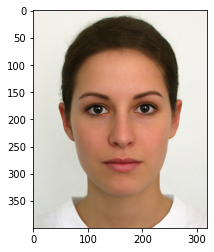

In [6]:
img = plt.imread('../images/girl_face_open_eye.jpg')
plt.imshow(img)

In [7]:
# Initializing the face detector and landmark detector
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("../shape_predictor_68_face_landmarks.dat")

In [12]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
cv2.imshow('Image in Consideration',gray)

In [ ]:
while True:
    _, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces = detector(gray)
    # detected face in faces array
    for face in faces:
        x1 = face.left()
        y1 = face.top()
        x2 = face.right()
        y2 = face.bottom()

        face_frame = frame.copy()
        cv2.rectangle(face_frame, (x1, y1), (x2, y2), (0, 255, 0), 2)

        landmarks = predictor(gray, face)
        landmarks = face_utils.shape_to_np(landmarks)

        # The numbers are actually the landmarks which will show eye
        left_blink = blinked(landmarks[36], landmarks[37],
                             landmarks[38], landmarks[41], landmarks[40], landmarks[39])
        right_blink = blinked(landmarks[42], landmarks[43],
                              landmarks[44], landmarks[47], landmarks[46], landmarks[45])

        # Now judge what to do for the eye blinks
        if (left_blink == 0 or right_blink == 0):
            sleep += 1
            drowsy = 0
            active = 0
            if (sleep > 6):
                status = "SLEEPING !!!"
                color = (255, 0, 0)

        elif (left_blink == 1 or right_blink == 1):
            sleep = 0
            active = 0
            drowsy += 1
            if (drowsy > 6):
                status = "Drowsy !"
                color = (0, 0, 255)

        else:
            drowsy = 0
            sleep = 0
            active += 1
            if (active > 6):
                status = "Active :)"
                color = (0, 255, 0)

        cv2.putText(frame, status, (100, 100), cv2.FONT_HERSHEY_SIMPLEX, 1.2, color, 3)

        for n in range(0, 68):
            (x, y) = landmarks[n]
            cv2.circle(face_frame, (x, y), 1, (255, 255, 255), -1)

    cv2.imshow("Frame", frame)
    cv2.imshow("Result of detector", face_frame)
    key = cv2.waitKey(1)
    if key == 27:
        break